In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [30]:
def load_cat_dog(HEIGHT, WIDTH, train_frac, test_frac):
    
    img_dir = './Datasets/cat_dog/train/'
    files = os.listdir(img_dir)
    
    N_CATEGORY = 2
    N_ALL = len(files)

    N_TRAIN = int(train_frac * N_ALL)
    x_train = np.empty((N_TRAIN, HEIGHT, WIDTH, 3), np.uint8)
    y_train = np.empty((N_TRAIN,), np.int8)

    for i in range(N_TRAIN):
        filename = files[i]
        img = load_img(img_dir + filename)
        img = img.resize((HEIGHT,WIDTH))
        x_train[i,] = img

        entry = filename.split('.')
        y_train[i] = 1 if entry[0] == 'dog' else 0
        
    N_TEST = int(test_ratio * N_ALL)
    x_test = np.empty((N_TEST, HEIGHT, WIDTH, 3), np.uint8)
    y_test = np.empty((N_TEST,), np.int8)

    for i in range(N_TEST):
        filename = files[i + N_TRAIN]
        img = load_img(img_dir + filename)
        img = img.resize((HEIGHT,WIDTH))
        x_test[i,] = img

        entry = filename.split('.')
        y_test[i] = 1 if entry[0] == 'dog' else 0
        
    return x_train, y_train, x_test, y_test, N_CATEGORY

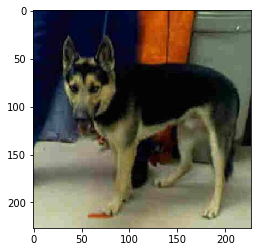

In [24]:
def load_cifar101(HEIGHT, WIDTH, train_frac, test_frac):
    img_dir = './Datasets/101_ObjectCategories/'
    categories = os.listdir(img_dir)
    N_CATEGORY = len(categories)

    cat_to_ind = dict()
    for ind, cat in enumerate(categories):
        cat_to_ind[cat] = ind
        
    all_img, all_label = [], []

    for category in categories:
        files = [ f for f in os.listdir(img_dir + category)]
        for file in files:
            filename = img_dir + category + '/' + file
            img = load_img(filename)
            img = img.resize((227,227))
            all_img.append(img)
            all_label.append(cat_to_ind[category])
            
    N_ALL = len(all_img)
    N_CATEGORY = len(np.unique(all_label))

    x_all = np.empty((N_ALL, 227, 227, 3), np.uint8)
    y_all = np_utils.to_categorical(train_label, num_labels)

    for i in range(N_ALL):
        x_all[i,:,:,:] = all_img[i]

    # shuffle data
    ind_list = [i for i in range(N_ALL)]
    shuffle(ind_list)
    x_all = x_all[ind_list, :,:,:]
    y_all = y_all[ind_list,]
    
    N_TRAIN = int(train_frac * N_ALL)
    N_TEST = int(test_frac * N_ALL)

    x_train = x_all[:N_TRAIN, :,:,:]
    y_train = y_all[:N_TRAIN,]

    x_test = x_all[N_TRAIN:N_TRAIN + N_TEST, :,:,:]
    y_test = y_all[N_TRAIN:N_TRAIN + N_TEST, ]
    
    return x_train, y_train, x_test, y_test, N_CATEGORY

In [ ]:
# def load_cifar101(HEIGHT, WIDTH, train_frac, test_frac):
        